# Домашнее задание 3 [10 баллов] 
# До 25.02.18 23:59

Задание выполняется в группе (1-4 человека). В случае использования какого-либо строннего источника информации обязательно дайте на него ссылку (поскольку другие тоже могут на него наткнуться). Плагиат наказывается нулём баллов за задание и предвзятым отношением в будущем.

Не все части обязательны для выполнения, однако вы можете быть дополнительно оштрафованы за небрежное за выполнение одной или двух частей вместо четырех.

При возниконовении проблем с выполнением задания обращайтесь с вопросами к преподавателю. Поэтому настоятельно рекомендуется выполнять задание заранее, оставив запас времени на всевозможные технические проблемы. Если вы начали читать условие в последний вечер и не успели из-за проблем с установкой какой-либо библиотеки — это ваши проблемы.


Результат выполнения задания — это отчёт в формате html на основе Jupyter Notebook. Нормальный отчёт должен включать в себя:
* Краткую постановку задачи и формулировку задания
* Описание **минимума** необходимой теории и/или описание используемых инструментов - не стоит переписывать лекции или Википедию
* Подробный пошаговый рассказ о проделанной работе
* Аккуратно оформленные результаты
* **Внятные выводы** – не стоит относится к домашнему заданию как к последовательности сугубо технических шагов, а стоит относится скорее как к небольшому практическому исследованию, у которого есть своя цель и свое назначение.

Небрежное его оформление отчета существенно отразится на итоговой оценке. Весь код из отчёта должен быть воспроизводимым, если для этого нужны какие-то дополнительные действия, установленные модули и т.п. — всё это должно быть прописано в тексте в явном виде.

Сдача отчетов осуществляется через систему AnyTask.


## Использование архитектуры SENNA для определения части речи

Домашнее задание написано по мотивам работы R. Collobert:

**Collobert, Ronan, Jason Weston, Léon Bottou, Michael Karlen, Koray Kavukcuoglu, and Pavel Kuksa. "Natural language processing (almost) from scratch." Journal of Machine Learning Research 12, no. Aug (2011): 2493-2537.**

В этом домашнем задании вам предстоит самостоятельно разработать архитектуру SENNA для определения части речи. 
SENNA – это простая архитектура нейронной сети, позволяющая достигнуть state-of-the-art результатов в нескольких задачах обработки текстов.  

Использование SENNA для определения части речи предполагает, что задача определения части речи для данного слова формулируется как задача классификации: пусть в размеченном корпусе всего $|T|$ (= tagset) различных тегов частей речи, тогда каждое слово $w$ относится к одному из $T$ классов. Для каждого слова из обучающих данных формируется собственный вектор признаков. Нейронная сеть обучается по всем векторам признаков для слов из обучающего множества. 

Подход к решению задачи классификации представлен в оригинальной статье на рис. 1 (Figure 1: Window approach network). Он состоит из следующих шагов (раздел 3.3.1):
1. Каждое слово представляется эмбеддингом: $w_i \rightarrow LT_{w^i}$, размерность эмбеддинга - $d$;
2. Для каждого слова формируется окно длины $k$ из $(k-1)/2$ соседних слов слева от данного слова  и $(k-1)/2$ соседних слов справа от данного слова, $k$ – нечетное. 
3. Для каждого слова формируется вектор признаков, состоящий из конкатенированных эмбеддингов слов из левого окна, данного слова и слов из правого окна. Итоговая размерность вектора признаков – $d \times k$. Именно этот вектор подается на вход нейронной сети;
4. Обучается нейронная сеть, имеющая один скрытый слой с $n_h$ нейроннами и нелинейной функцией активации $\theta$;
5. На выходном слое нейронной сети решается задача классификации на |T| классов, то есть, определяется часть речи для каждого слова. 

Если для слова невозможно найти $(k-1)/2$ соседних слов слева от данного слова  и $(k-1)/2$ соседних слов справа от данного слова – используется padding.


### Данные
1. Открытый корпус: https://github.com/dialogue-evaluation/morphoRuEval-2017/blob/master/OpenCorpora_Texts.rar
2. Предобученные эмбеддинги Facebook: https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki.ru.vec

### Команда

- Анна Лапидус
- Анастасия Кузнецова

### Постановка задачи и формулировка задания

__Задача__: на основе имеющегося аннотированого корпуса русского языка обучить модель, присваивающую словам теги частей речи. 

__Задание__:

1. Разбить существующий корпус на обучающее и тестовое множества;
2. Написать функцию, разбивающую предложения на окна длины $k$ (присваивать эмбединги контекстным словам и конкатенировать их будем прямо в нейронной сети);
3. Обучить модель прямого распространения на обучающем множестве;
4. Оценить результаты классификации; 
5. Провести оптимизацию гиперпараметров для получения наилучшего результата;
6. Провести анализ ошибок модели.

### Теория

__Нейронная сеть прямого распространения (перцептрон)__

Задача определения тегов частей речи — это классическая задача классификации. Для ее реализации подойдет классическая сеть прямого распространения. При такой архитектуре сети все связи направлены строго от входных нейронов к выходным. Наша сеть будет состоять из трех слоев: входного слоя (конкатенированных эмбедингов для окна слов), скрытого слоя с функцией активации и выходного слоя с количеством нейронов, равным числу классов (тегов частей речи) и функцией softmax для получения вероятностного распределения по классам. 

__Окно обучения__

Окно обучения — это то количество слов, которое мы учитываем в качестве контекста для данного слова слева и справа. Слова из контекста для данного слова мы будем использовать в качестве признаков для обучения. Обычно окно задается нечетным числом. Мы будем использовать окно из 5-ти слов, где два слева и два слова справа — контексты данного слова. Затем каждому слову из контекста мы будем присваивать предобученный эмбединг, и для получения вектора признаков -- конкатенировать эмбединги.

__Эмбединги__

Эмбединги — это векторные представления слов, характеризующие их совместную встречаемость. Вектора обучены на корпусе так, что вектора слов, часто встречающихся в одинаковых контекстах, оказываются близки по косинусной мере.
Эмбединги имеют определенную размерность (здесь размерность вектора эмбединга -- 300).

__Функции активации__


__Softmax__


Softmax преобразует значения, полученнные с предыдущего слоя, в вероятности принадлежности входного вектора классу. Поэтому функция softmax используется на выходном слое сети для решения задач многоклассовой классификации. Softmax дает на выходе значение от 0 до 1. Мы попробовали так же применить ее на скрытом слое.
Однако, судя по информации на форумах, softmax редко используется для скрытых слоев. Softmax возвращает вероятностное распределение выходов предыдущего слоя, что делает их зависимыми и ограничивает активацию нейронов значениями от 0 до 1.

Вместо softmax на скрытых слоях используют функции sigmoid (или гиперболический тангенс) или ReLU.


__ReLU__

Rectified Liner Units функция принимает значение 0 в случае отрицательного значения аргумента, в случае положительного аргумента — принимает значение, равное аргументу. Таким образом, функция ReLU выполняет роль порогового значения, равного 0. 
В отличие от softmax функция ReLU воpвращает значение от 0 до бесконечности (т.е. не ограничивает активацию нейронов).  
Сеть c ReLU быстрее обучается, чем с функцией sigmoid на скрытых слоях, поскольку она не активирует нейроны с отрицательным значением выхода. И в отличие от sigmoid не теряет обучающей способности в многослойных сетях

(https://github.com/Kulbear/deep-learning-nano-foundation/wiki/ReLU-and-Softmax-Activation-Functions).

Поэтому мы решили попробовать ReLU в качестве функции активации на скрытом слое в одном из наших экспериментов. 

__Функция потерь__

В качестве функции потерь мы будем использовать кросскатегориальную энтропию. Она используется в задачах мультиклассовой классификации (оценивает близость вектора вероятностей, полученного после функции активации, к one-hot вектору реальной принадлежности входного объекта классу).

### Часть 1 [2 балла] Подготовка данных
1. Прочитайте размеченные данные Открытого корпуса, используя nltk.corpus.reader.conll.ConllCorpusReader
2. Посчитайте количество предложений и число тегов частей речи;
3. Сформируйте тестовое и обучающее множество: первые 3/4 данных – обучающее множество;

Для каждого слова:
1. Определите его окно (слова слева и справа) размера $k$;
2. Сформируйте его вектор признаков.

### 1. Прочитайте размеченные данные Открытого корпуса.###

In [1]:
import sys
sys.path.append('C:\Program Files\Anaconda3\Lib\site-packages')

#### Импортируем библиотеки

Для обучения нашей сети будем использовать библиотеку _Keras_.

In [1]:
from nltk.corpus.reader import ConllCorpusReader


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

from keras.layers import Embedding, Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.models import Model, Sequential

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import random
random.seed(1228)

from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix

%matplotlib inline

from sklearn.model_selection import train_test_split
from tqdm import tqdm

/home/nst/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
root = '/home/nst/mount/data/linguistics_hse/machine_learning/hw_3/'
fileid = 'unamb_sent_14_6.conllu'

In [3]:
root = './'
fileid = 'unamb_sent_14_6.conllu'

#### Читаем корпус с помощью модуля nltk ConllCorpusReader

In [3]:
pos_corpus = ConllCorpusReader(root, fileids = fileid, columntypes = ['ignore', 'words', 'ignore', 'pos', 'chunk'])
sents = list(pos_corpus.iob_sents())

### 2. Посчитайте количество предложений и число тегов частей речи. ###

In [4]:
sents[105]

[('Хотя', 'CONJ', '_'),
 ('здесь', 'ADV', '_'),
 ('режиссер', 'NOUN', '_'),
 ('начинает', 'VERB', '_'),
 ('«', 'PUNCT', '_'),
 ('плыть', 'VERB', '_'),
 ('»', 'PUNCT', '_'),
 (':', 'PUNCT', '_'),
 ('хочет', 'VERB', '_'),
 (',', 'PUNCT', '_'),
 ('чтобы', 'CONJ', '_'),
 ('герой', 'NOUN', '_'),
 ('получился', 'VERB', '_'),
 ('одновременно', 'ADV', '_'),
 ('развлекающимся', 'ADJ', '_'),
 ('и', 'CONJ', '_'),
 ('не', 'PART', '_'),
 ('на', 'ADP', '_'),
 ('шутку', 'NOUN', '_'),
 ('влюбленным', 'ADJ', '_'),
 ('.', 'PUNCT', '_')]

In [6]:
pos_tags = [pos for text in sents for word, pos, chunk in text]

In [7]:
print('Количество предложений:', len(sents))
print('Число тегов частей речи:', len(set(pos_tags)))

Количество предложений: 38508
Число тегов частей речи: 14


### 3. Сформируйте тестовое и обучающее множество ###

Для каждого слова определите его окно (слова слева и справа) размера $k$.

Для того, чтобы определить окно размера $k$ мы пишем функцию, которая берет контекст слова из предложения справа и слева, при том, если у слова нет какого-то из контекстов, в процессе преобразования слов в вектора нам необходимо будет вставлять специальный символ _pad_, который заполняет пустые контексты для того, чтобы все векоторы при вхождении в нейронную сеть оказались фиксированной длины. Чтобы впоследствии вставить _pad_ в необходимый контекст (правый или левый) функция должна возвращать два отдельных списка окон.

In [4]:
def get_context(word_index, word_list, k): #k - размер окна
    if k > len(word_list):
        k = len(word_list)
    left_pad = 0 #Слова, у которых нет левого контекста + нормальные 5-граммы
    right_pad = 0 #Слова без правого котекста
    left_index = word_index - int((k-1)/2)
    right_index = word_index + int((k+1)/2)
    if left_index >= 0 and right_index <= len(word_list):
        context = word_list[left_index:right_index]
        context = ' '.join(context)
        left_pad = context
    if left_index < 0:
        left_index = 0
        context = word_list[left_index:right_index]
        context = ' '.join(context)
        left_pad = context
    if right_index > (len(word_list)):
        right_index = (len(word_list)) 
        context = word_list[left_index:right_index]
        context = ' '.join(context)
        right_pad = context
    return left_pad, right_pad

Функция принимает на вход корпус текстов и необхоимый размер окна и возвращает списки правых и левых контекстов с соответствующими им тегами частей речи.

In [5]:
def sents_to_windows(sentences, k): #k - размер окна
    windows_left = []
    windows_right = []
    pos_left = []
    pos_right = []
    for sentence in sentences:
        word_sequence = [word for word, pos, chunk in sentence]
        pos_sequence = [pos for word, pos, cunk in sentence]
        for i, word in enumerate(word_sequence):
            left_window, right_window = get_context(i, word_sequence, k)
            if left_window == 0:
                windows_right.append(right_window)
                pos_right.append(pos_sequence[i])
            else:
                windows_left.append(left_window)
                pos_left.append(pos_sequence[i])
    return windows_left, windows_right, pos_left, pos_right

In [6]:
win_left, win_right, pos_left, pos_right = sents_to_windows(sents, 5)

In [7]:
print(win_left[:10])
print(pos_left[:10])
print(win_right[:10])
print(pos_right[:10])

['« Школа злословия', '« Школа злословия »', '« Школа злословия » учит', 'Школа злословия » учит прикусить', 'злословия » учит прикусить язык', 'Сохранится ли градус', 'Сохранится ли градус дискуссии', 'Сохранится ли градус дискуссии в', 'ли градус дискуссии в новом', 'градус дискуссии в новом сезоне']
['PUNCT', 'NOUN', 'NOUN', 'PUNCT', 'VERB', 'VERB', 'PART', 'NOUN', 'NOUN', 'ADP']
['» учит прикусить язык', 'учит прикусить язык', 'в новом сезоне ?', 'новом сезоне ?', 'в новом формате .', 'новом формате .', '« ребрендинг » .', 'ребрендинг » .', 'телевидении стандартам телеведущих .', 'стандартам телеведущих .']
['VERB', 'NOUN', 'NOUN', 'PUNCT', 'NOUN', 'PUNCT', 'PUNCT', 'PUNCT', 'NOUN', 'PUNCT']


#### Импортируем предобученные эмбединги

In [8]:
root_embed = '/home/nst/mount/data/linguistics_hse/machine_learning/hw_3/wiki.ru.vec'

In [20]:
root_embed = 'D:/баклажан/КомпЛинг/ML/wiki.ru.vec' #embeddings, обученные в facebook с помощью fasttext

In [9]:
words = []

embeddings_index = {}
fo = open(root_embed, encoding = 'utf-8')
for line in tqdm(fo):
    values = line.split()
    if len(values) == 301:
        word = values[0]
        words.append(word)
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
fo.close()

1888424it [05:04, 6196.05it/s]


In [50]:
print(embeddings_index['красивого'])

[ 0.063412   0.14397   -0.26148   -0.069429  -0.037841  -0.13371
  0.24357   -0.0070416 -0.57922    0.08532    0.060534   0.56343
 -0.012783  -0.075452  -0.090881   0.21186    0.15511   -0.27608
  0.62067    0.45264   -0.024836  -0.23692    0.35527   -0.086528
 -0.42788    0.51174    0.055661  -0.10096   -0.47313    0.042426
 -0.22661    0.15796    0.15355   -0.15672    0.46446   -0.33252
  0.027125   0.23902    0.28476    0.37342    0.16879    0.27743
 -0.39315   -0.14941   -0.5146    -0.29143   -0.63557   -0.26363
 -0.061703  -0.67537    0.49611   -0.19921    0.037425   0.47747
 -0.024457   0.058589  -0.30892   -0.31852    0.10311    0.44346
  0.43057    0.13907   -0.27656    0.11768    0.13713    0.13852
  0.4869    -0.042093   0.28837   -0.038571   0.030931  -0.08215
  0.19207   -0.26899   -0.49007   -0.37879    0.14264   -0.04197
  0.25837    0.33895   -0.3164     0.22006    0.44975   -0.0086994
  0.12849   -0.077759   0.14377    0.26395    0.46818   -0.20803
 -0.076734  -0.37212 

#### Формируем обучающее и тестовое множество

In [10]:
train, test = train_test_split(sents, test_size=0.25)

In [11]:
LEN_WINDOW = 5 #задаем размер окна 
EMBEDDING_DIM = 300 #размерность векторов эмбеддингов

Строим окна для обучающей выборки

In [12]:
train_win_left, train_win_right, train_pos_left, train_pos_right = sents_to_windows(train, LEN_WINDOW)

In [13]:
#объединим левые и правые окна для токенайзера
train_all = train_win_left + train_win_right

Преобразовываем окна в последовательности чисел, заполняя пустые контекста $pad$'ами с помощью класса `Tokenizer()`.

https://keras.io/preprocessing/text/

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_all) #обучили токенайзер словам из трейна

sequences_left = tokenizer.texts_to_sequences(train_win_left)
X_train_left = pad_sequences(sequences_left, maxlen = LEN_WINDOW, padding = 'pre')

sequences_right = tokenizer.texts_to_sequences(train_win_right)
X_train_right = pad_sequences(sequences_right, maxlen = LEN_WINDOW, padding = 'post')

In [15]:
X_train = np.concatenate((X_train_left, X_train_right), axis = 0)

Обучающая выборка готова.

In [16]:
X_train[5]

array([25552,  1991,    87,  3209, 25553], dtype=int32)

Объединяем правые и левые теги для обучающего множества.

In [17]:
pos_train = train_pos_left + train_pos_right

Кодируем теги трейна, чтобы подать на вход нейросети с заданным числом классов (равно количеству частей речи) 14.

In [18]:
le = LabelEncoder()
le.fit(pos_train)
y_train = np_utils.to_categorical(le.transform(pos_train), 14) 
print(y_train[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Формируем тестовое множество аналогичным образом.

In [19]:
test_win_left, test_win_right, test_pos_left, test_pos_right = sents_to_windows(test, LEN_WINDOW)

In [20]:
sequences_left = tokenizer.texts_to_sequences(test_win_left)
X_test_left = pad_sequences(sequences_left, maxlen = LEN_WINDOW, padding = 'pre')

sequences_right = tokenizer.texts_to_sequences(test_win_right)
X_test_right = pad_sequences(sequences_right, maxlen = LEN_WINDOW, padding = 'post')

In [21]:
X_test = np.concatenate((X_test_left, X_test_right), axis = 0)
pos_test = test_pos_left + test_pos_right
y_true = pos_test

### Часть 2 [4 баллов] Архитектура нейронной сети

Архитектура нейронной сети состоит из следующих слов:
1. Входной слой: нейронная сеть получает на вход вектор признаков, состоящий из $k$ конкатенированных эмбеддингов;
2. Скрытый слой: $n_h$ нейронов и нелинейная функция активации $\theta$;
3. Выходной слой:  $|T|$ нейронов для итоговой классификации.

Обучите нейронную сеть на обучающих данных.

#### Составляем матрицу эмбедингов для подачи на входной слой сети

Размер матрицы -- длина словаря + 1 символ для $pad$.

In [22]:
word_index = tokenizer.word_index
len(word_index)

65780

In [23]:
#какая строчка из матрицы соответствует каждому слову из словаря
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

#### Строим перцептрон

1. Входной слой -- слой с эмбедингами;
2. Второй слой -- скрытый слой с 64 нейронами и функцией активации $softmax$. 
3. Выходной слой имеет 14 нейронов (столько же сколько и частей речи), функция активации $softmax$.

In [41]:
model = Sequential()

model.add(Embedding(len(word_index) + 1, #объем словаря + 1 символ для pad
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=LEN_WINDOW,
                            trainable=False))
model.add(Flatten()) #конкатенирует входные вектора эмбеддингов
model.add(Dense(64, activation = 'softmax'))
model.add(Dropout(0.1))
model.add(Dense(len(set(pos_train)), activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Обучаем модель 10 эпох.

In [42]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32,  validation_split = 0.1)

Train on 308583 samples, validate on 34288 samples
Epoch 1/10
308583/308583 [==============================] - 111s 358us/step - loss: 1.6147 - acc: 0.4873 - val_loss: 0.7791 - val_acc: 0.8287
Epoch 2/10
308583/308583 [==============================] - 109s 353us/step - loss: 1.3578 - acc: 0.5431 - val_loss: 0.6896 - val_acc: 0.8366
Epoch 3/10
308583/308583 [==============================] - 116s 377us/step - loss: 1.2274 - acc: 0.5910 - val_loss: 0.6196 - val_acc: 0.8525
Epoch 4/10
308583/308583 [==============================] - 120s 389us/step - loss: 1.1413 - acc: 0.6217 - val_loss: 0.5948 - val_acc: 0.8538
Epoch 5/10
308583/308583 [==============================] - 111s 361us/step - loss: 1.0945 - acc: 0.6398 - val_loss: 0.5921 - val_acc: 0.8542
Epoch 6/10
308583/308583 [==============================] - 119s 387us/step - loss: 1.0581 - acc: 0.6521 - val_loss: 0.5801 - val_acc: 0.8576
Epoch 7/10
308583/308583 [==============================] - 121s 394us/step - loss: 1.0285 - acc:

### Часть 3 [1 балл] Оценка качества

Протестируйте нейронную сеть на тестовых данных. Используйте accuracy для оценки качества модели.

Для того, чтобы оценить качество классификации, построим матрицу ошибок, посчитаем метрики: precision, recall, F-score.

In [ ]:
y_pred = model.predict_classes(X_test)
y_pred = le.inverse_transform(y_pred)

/home/nst/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

        ADJ       0.60      0.44      0.50     11971
        ADP       0.58      0.66      0.62     10840
        ADV       0.51      0.42      0.46      3307
       CONJ       0.54      0.65      0.59      5550
        DET       0.53      0.48      0.51      3131
       INTJ       0.00      0.00      0.00       124
       NOUN       0.63      0.61      0.62     30522
        NUM       0.54      0.44      0.48      2467
       PART       0.49      0.49      0.49      2243
       PRON       0.52      0.45      0.48      2255
      PROPN       0.60      0.45      0.52      3860
      PUNCT       0.52      0.72      0.60     22784
       VERB       0.61      0.51      0.55     10400
          X       0.51      0.28      0.36      5258

avg / total       0.57      0.57      0.57    114712



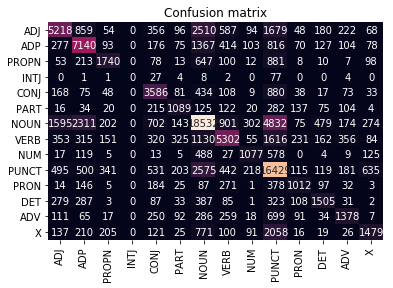

In [47]:
labels = list(set(pos_test))
print(classification_report(y_true, y_pred))
sns.heatmap(data=confusion_matrix(y_true, y_pred, labels = labels), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

При такой архитектуре модели получаем F-меру чуть выше среднего -- 57%.

### Часть 3 [1 балл] Оптимизация гиперпарметров

В эксперименте участвуют следующие гиперпараметры:
* $k$ – размер окна;
* $n_h$ – число нейронов на скрытом слое;
* $\theta$ – вид функции активации.

Оцените их влияние на качество модели. Как увеличение окна или числа нейронов влияет на итоговый показатель качества? Зависит ли итоговый показатель качества от функции активации на скрытом слое? 

Для начала попробуем использовать разные функции активации на скрытом и выходном слое. Будем использовать ReLU на скрытом слое и Softmax на выходном.

In [24]:
model = Sequential()

model.add(Embedding(len(word_index) + 1, #объем словаря + 1 символ для pad
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=LEN_WINDOW,
                            trainable=False))
model.add(Flatten()) #конкатенирует входные вектора эмбеддингов
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(len(set(pos_train)), activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [25]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32,  validation_split = 0.1)

Train on 309015 samples, validate on 34336 samples
Epoch 1/10
309015/309015 [==============================] - 101s 325us/step - loss: 1.0503 - acc: 0.6411 - val_loss: 0.5758 - val_acc: 0.8564
Epoch 2/10
309015/309015 [==============================] - 108s 350us/step - loss: 0.8600 - acc: 0.6961 - val_loss: 0.5404 - val_acc: 0.8626
Epoch 3/10
309015/309015 [==============================] - 108s 350us/step - loss: 0.8095 - acc: 0.7108 - val_loss: 0.5400 - val_acc: 0.8600
Epoch 4/10
309015/309015 [==============================] - 107s 348us/step - loss: 0.7804 - acc: 0.7185 - val_loss: 0.5459 - val_acc: 0.8604
Epoch 5/10
309015/309015 [==============================] - 95s 309us/step - loss: 0.7599 - acc: 0.7253 - val_loss: 0.5434 - val_acc: 0.8649
Epoch 6/10
309015/309015 [==============================] - 94s 304us/step - loss: 0.7448 - acc: 0.7293 - val_loss: 0.5330 - val_acc: 0.8639
Epoch 7/10
309015/309015 [==============================] - 92s 297us/step - loss: 0.7330 - acc: 0.

In [26]:
y_pred = model.predict_classes(X_test)
y_pred = le.inverse_transform(y_pred)

/home/nst/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

        ADJ       0.61      0.47      0.53     11798
        ADP       0.57      0.66      0.61     10664
        ADV       0.50      0.50      0.50      3315
       CONJ       0.53      0.68      0.60      5492
        DET       0.59      0.63      0.61      3151
       INTJ       0.52      0.29      0.37       117
       NOUN       0.67      0.59      0.63     30497
        NUM       0.40      0.53      0.46      2446
       PART       0.53      0.55      0.54      2234
       PRON       0.58      0.55      0.56      2242
      PROPN       0.59      0.48      0.53      3669
      PUNCT       0.55      0.72      0.62     22706
       VERB       0.59      0.55      0.57     10418
          X       0.60      0.26      0.36      5483

avg / total       0.59      0.59      0.58    114232



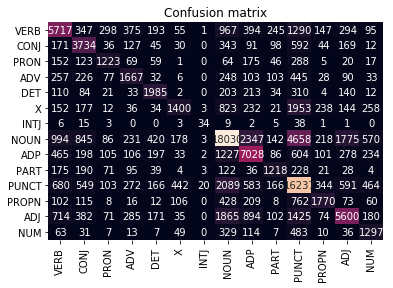

In [27]:
labels = list(set(pos_test))
print(classification_report(y_true, y_pred))
sns.heatmap(data=confusion_matrix(y_true, y_pred, labels = labels), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [28]:
print('Accuracy score:', accuracy_score(y_true, y_pred))

Accuracy score: 0.5860004201974928


Качество стало немного лучше, на пару процентов.

Попробуем изменить размер окна на 3 (для этого перестроим тестовую и трейновую выборки) и уменьшить кол-во нейронов на скрытом слое до 32.

In [75]:
LEN_WINDOW = 3 #задаем размер окна 
EMBEDDING_DIM = 300 #размерность векторов эмбеддингов

In [86]:
train_win_left, train_win_right, train_pos_left, train_pos_right = sents_to_windows(train, LEN_WINDOW)

In [87]:
train_all = train_win_left + train_win_right

In [88]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_all) #обучили токенайзер словам из трейна

sequences_left = tokenizer.texts_to_sequences(train_win_left)
X_train_left = pad_sequences(sequences_left, maxlen = LEN_WINDOW, padding = 'pre')

sequences_right = tokenizer.texts_to_sequences(train_win_right)
X_train_right = pad_sequences(sequences_right, maxlen = LEN_WINDOW, padding = 'post')

In [89]:
X_train = np.concatenate((X_train_left, X_train_right), axis = 0)

In [90]:
pos_train = train_pos_left + train_pos_right

In [91]:
le = LabelEncoder()
le.fit(pos_train)
y_train = np_utils.to_categorical(le.transform(pos_train), 14) #14 - число классов (частей речи)
print(y_train[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [92]:
word_index = tokenizer.word_index
len(word_index)

65999

In [93]:
model = Sequential()

model.add(Embedding(len(word_index) + 1, 
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=LEN_WINDOW,
                            trainable=False))
model.add(Flatten())
model.add(Dense(32, activation = 'softmax'))
model.add(Dropout(0.1))
model.add(Dense(len(set(pos_train)), activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [94]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32,  validation_split = 0.1)

Train on 308583 samples, validate on 34288 samples
Epoch 1/10
308583/308583 [==============================] - 64s 206us/step - loss: 1.7436 - acc: 0.4464 - val_loss: 1.8886 - val_acc: 0.2555
Epoch 2/10
308583/308583 [==============================] - 55s 177us/step - loss: 1.5452 - acc: 0.4826 - val_loss: 1.8504 - val_acc: 0.2633
Epoch 3/10
308583/308583 [==============================] - 65s 212us/step - loss: 1.4928 - acc: 0.4934 - val_loss: 1.7457 - val_acc: 0.3119
Epoch 4/10
308583/308583 [==============================] - 64s 206us/step - loss: 1.4519 - acc: 0.5066 - val_loss: 1.8197 - val_acc: 0.3192
Epoch 5/10
308583/308583 [==============================] - 65s 210us/step - loss: 1.4145 - acc: 0.5210 - val_loss: 1.6396 - val_acc: 0.4592
Epoch 6/10
308583/308583 [==============================] - 68s 221us/step - loss: 1.3885 - acc: 0.5315 - val_loss: 1.8529 - val_acc: 0.3661
Epoch 7/10
308583/308583 [==============================] - 62s 202us/step - loss: 1.3672 - acc: 0.5382

Так же изменим тестовое множество и протестируем модель.

In [95]:
test_win_left, test_win_right, test_pos_left, test_pos_right = sents_to_windows(test, LEN_WINDOW)

In [96]:
sequences_left = tokenizer.texts_to_sequences(test_win_left)
X_test_left = pad_sequences(sequences_left, maxlen = LEN_WINDOW, padding = 'pre')

sequences_right = tokenizer.texts_to_sequences(test_win_right)
X_test_right = pad_sequences(sequences_right, maxlen = LEN_WINDOW, padding = 'post')

In [97]:
X_test = np.concatenate((X_test_left, X_test_right), axis = 0)

In [98]:
pos_test = test_pos_left + test_pos_right

In [99]:
y_true = le.transform(pos_test)

In [101]:
y_pred = model.predict_classes(X_test)
y_pred = le.inverse_transform(y_pred)

/home/nst/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


/home/nst/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

        ADJ       0.42      0.11      0.17     11971
        ADP       0.70      0.77      0.74     10840
        ADV       0.62      0.24      0.34      3307
       CONJ       0.70      0.73      0.72      5550
        DET       0.72      0.45      0.56      3131
       INTJ       0.00      0.00      0.00       124
       NOUN       0.41      0.73      0.52     30522
        NUM       0.59      0.35      0.44      2467
       PART       0.79      0.58      0.67      2243
       PRON       0.69      0.64      0.66      2255
      PROPN       0.00      0.00      0.00      3860
      PUNCT       0.48      0.53      0.51     22784
       VERB       0.53      0.27      0.36     10400
          X       0.34      0.04      0.07      5258

avg / total       0.49      0.50      0.46    114712



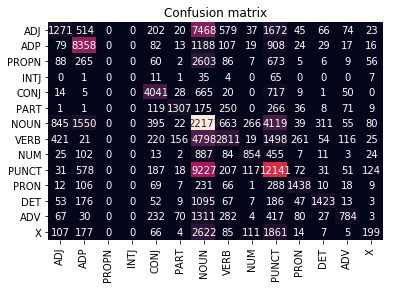

In [102]:
labels = list(set(pos_test))
print(classification_report(y_true, y_pred))
sns.heatmap(data=confusion_matrix(y_true, y_pred, labels = labels), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [111]:
print('Accuracy score:', accuracy_score(y_true, y_pred))

Accuracy score: 0.49518794895041496


С меньшим количеством нейронов и меньшим размером окна качество значительно ухудшилось.

### Результаты классификации

- Однозначно можно сказать, что качество классификации зависит от всех трех гиперпараметров, с которыми мы экспериментировали: размера окна, количества нейронов на скрытом уровне, функции активации.

- Наилучшим образом себя показало сочетание функций активации ReLU (на скрытом слое) и Softmax (на выходном слое), качество классификации составило accuracy 58%. 

### Часть 3 [2 балла] Анализ ошибок
1. Привидите примеры из тестового множества, на которых нейронная сеть ошибается. Объясните, почему возникают ошибки.
2. Протестируйте нейронную сеть на произвольном предложении (не из тестовых данных). Возникают ли ошибки? Почему?

Замечание: анализ ошибок будет производиться на лучшей модели с 64 нейронами на скрытом слое, окном 5 и функциями активации ReLU и Softmax.

In [38]:
predicted = pd.DataFrame(y_pred, columns=['Predicted'])
true_values = pd.DataFrame(y_true, columns=['True'])
predicted_df = predicted.join(true_values)

In [39]:
predicted_df.head()

,Predicted,True
0,ADP,ADP
1,ADP,NOUN
2,NOUN,NOUN
3,NOUN,ADJ
4,PUNCT,NOUN


Выведем все ошибки, которые допустила сеть.

In [50]:
errors_df = predicted_df[predicted_df['Predicted'] != predicted_df['True']]

In [55]:
print('Whole sample:', len(predicted_df))
print('Number of errors:', len(errors_df))

Whole sample: 114232
Number of errors: 47292


In [58]:
errors_df.head(50)

,Predicted,True
1,ADP,NOUN
3,NOUN,ADJ
4,PUNCT,NOUN
5,ADJ,VERB
7,ADJ,NOUN
9,VERB,NOUN
16,VERB,PUNCT
17,PUNCT,CONJ
18,CONJ,NOUN
20,CONJ,PART


__Пример из тестовых данных__

In [102]:
print('True:', y_true[:8],'\nPredicted:', y_pred[:20])
print('В условиях рынка несовершенной конкуренции формируются субъективные цены товаров.')

True: ['ADP', 'NOUN', 'NOUN', 'ADJ', 'NOUN', 'VERB', 'ADJ', 'NOUN'] 
Predicted: ['ADP' 'ADP' 'NOUN' 'NOUN' 'ADJ' 'PUNCT' 'PUNCT' 'PUNCT' 'PUNCT']
В условиях рынка несовершенной конкуренции формируются субъективные цены товаров.


В примере путаются классы:
- Существительных и предлогов (условиях)
- Прилагательных и существительных (несовершенной)
- Глагол vs. Пунктуация (формируются)
- Существительные vs. Пунктуация. 

In [75]:
print(test[0][:20])

[('В', 'ADP', '_'), ('условиях', 'NOUN', '_'), ('рынка', 'NOUN', '_'), ('несовершенной', 'ADJ', '_'), ('конкуренции', 'NOUN', '_'), ('формируются', 'VERB', '_'), ('субъективные', 'ADJ', '_'), ('цены', 'NOUN', '_'), ('товаров', 'NOUN', '_'), ('.', 'PUNCT', '_')]


__ Тест на произвольном предложении __

In [76]:
def make_windows(random_sent, k):
    windows_left = []
    windows_right = []
    
    for i, word in enumerate(random_sent):
        l, r = get_context(i, random_sent, k)
        if l == 0:
            windows_right.append(r)
        else:
            windows_left.append(l)
    return windows_left, windows_right
        

In [87]:
rand_sent = 'есть в осени первоначальной короткая , но дивная пора'.split()

In [88]:
win_left, win_right = make_windows(rand_sent, 5)

In [89]:
print(win_left)
print(win_right)

['есть в осени', 'есть в осени первоначальной', 'есть в осени первоначальной короткая', 'в осени первоначальной короткая ,', 'осени первоначальной короткая , но', 'первоначальной короткая , но дивная', 'короткая , но дивная пора']
[', но дивная пора', 'но дивная пора']


In [90]:
sequences_left = tokenizer.texts_to_sequences(win_left)
X_test_left = pad_sequences(sequences_left, maxlen = LEN_WINDOW, padding = 'pre')

sequences_right = tokenizer.texts_to_sequences(win_right)
X_test_right = pad_sequences(sequences_right, maxlen = LEN_WINDOW, padding = 'post')

In [91]:
X_test = np.concatenate((X_test_left, X_test_right), axis = 0)

In [94]:
y_pred = model.predict_classes(X_test)
y_pred = le.inverse_transform(y_pred)
print(y_pred)
#есть в осени первоначальной короткая , но дивная пора

['ADP' 'ADP' 'NOUN' 'NOUN' 'ADJ' 'PUNCT' 'PUNCT' 'PUNCT' 'PUNCT']


/home/nst/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

        ADJ       0.61      0.47      0.53     11798
        ADP       0.57      0.66      0.61     10664
        ADV       0.50      0.50      0.50      3315
       CONJ       0.53      0.68      0.60      5492
        DET       0.59      0.63      0.61      3151
       INTJ       0.52      0.29      0.37       117
       NOUN       0.67      0.59      0.63     30497
        NUM       0.40      0.53      0.46      2446
       PART       0.53      0.55      0.54      2234
       PRON       0.58      0.55      0.56      2242
      PROPN       0.59      0.48      0.53      3669
      PUNCT       0.55      0.72      0.62     22706
       VERB       0.59      0.55      0.57     10418
          X       0.60      0.26      0.36      5483

avg / total       0.59      0.59      0.58    114232



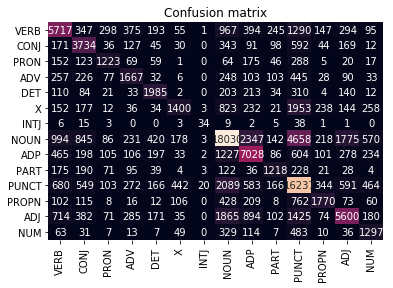

In [72]:
labels = list(set(pos_test))
print(classification_report(y_true, y_pred))
sns.heatmap(data=confusion_matrix(y_true, y_pred, labels = labels), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

### Выводы

По матрице ошибок и по нашему примеру из тестового множества и произвольного примера видно, что модель:

1. Часто ошибается в определении класса X (тег для множества "Другое"), путает его с пунктуацией или существительными. Это сборный класс для слов, которые не подходят под другие части речи. Следовательно, он представляет сложности для классификации.
2. Путает прилагательные с существительными. Возможно, может объясняться тем, что прилагательные и существительные часто встречаются в похожих позициях (относительно других частей речи: и существительные, и прилагательные могут стоять рядом с существительными, после предлогов).
3. Любые части речи часто путаются с пунктуацией. Возможно, нужно было обучать модель без знаков пунктуации. Изначально мы предположили, что пунктуация, наоборот, поможет нам предсказывать классы.